Используем набор примеров fashion-MNIST
1. Опишите - какой результат нейросети получен в зависимости от:
  - числа нейронов в слое (для 2-х слойной сети), 
  - числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых параметров).
  - фиксируйте для тренировочного и тестового набора метрики accuracy.

In [54]:
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

In [55]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

print(X_train.shape, X_test.shape)
print(y_train_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [56]:
classes = {'0': 'T-shirt/top',
           '1': 'Trouser',
           '2': 'Pullover',
           '3': 'Dress',
           '4': 'Coat',
           '5': 'Sandal',
           '6': 'Shirt',
           '7': 'Sneaker',
           '8': 'Bag',
           '9': 'Ankle boot'}

Label is 8


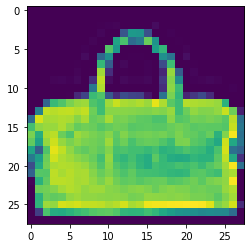

In [57]:
ind = np.random.randint(0, X_train.shape[0])
plt.imshow(X_train[ind])
print(f'Label is {y_train_labels[ind]}')

In [5]:
X_train.min(), X_train.max()

(0, 255)

In [6]:
# Data normalisation
# Нам теперь нужно конверитировать значения пикселей из вида от 0 до 255 в набор значений от 0 до 1.

X_train = X_train / 255.0
X_test = X_test / 255.0
X_train.min(), X_train.max()

(0.0, 1.0)

In [7]:
X_train = X_train.reshape((-1, 28 * 28))
X_test = X_test.reshape((-1, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [9]:
y_train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [10]:
# делаем one-hot-encoding таргета

y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [11]:
X_train.shape, y_train.shape

((60000, 784), (60000, 10))

In [12]:
# define the keras model
n_neurons = [5, 7, 10, 12, 15, 17, 20, 22, 25]
results = {}

for n in n_neurons: 

    model = Sequential([
        Dense(n, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid')
    ])

    model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

    mod = model.fit(X_train, y_train,
                      epochs=10,
                      batch_size=500, 
                      verbose=1,
                      validation_split=0.2)

    results[f'model_{n}_neurons'] = mod.history

Epoch 1/10
96/96 [==============================] - 1s 6ms/step - loss: 2.1877 - accuracy: 0.2137 - val_loss: 2.0679 - val_accuracy: 0.2929
Epoch 2/10
96/96 [==============================] - 0s 4ms/step - loss: 1.9865 - accuracy: 0.3015 - val_loss: 1.9153 - val_accuracy: 0.3106
Epoch 3/10
96/96 [==============================] - 0s 4ms/step - loss: 1.8568 - accuracy: 0.3093 - val_loss: 1.8059 - val_accuracy: 0.3203
Epoch 4/10
96/96 [==============================] - 0s 4ms/step - loss: 1.7660 - accuracy: 0.3299 - val_loss: 1.7299 - val_accuracy: 0.3406
Epoch 5/10
96/96 [==============================] - 0s 4ms/step - loss: 1.7011 - accuracy: 0.3480 - val_loss: 1.6733 - val_accuracy: 0.3618
Epoch 6/10
96/96 [==============================] - 0s 4ms/step - loss: 1.6511 - accuracy: 0.3600 - val_loss: 1.6281 - val_accuracy: 0.3682
Epoch 7/10
96/96 [==============================] - 0s 4ms/step - loss: 1.6103 - accuracy: 0.3656 - val_loss: 1.5907 - val_accuracy: 0.3713
Epoch 8/10
96/96 [==

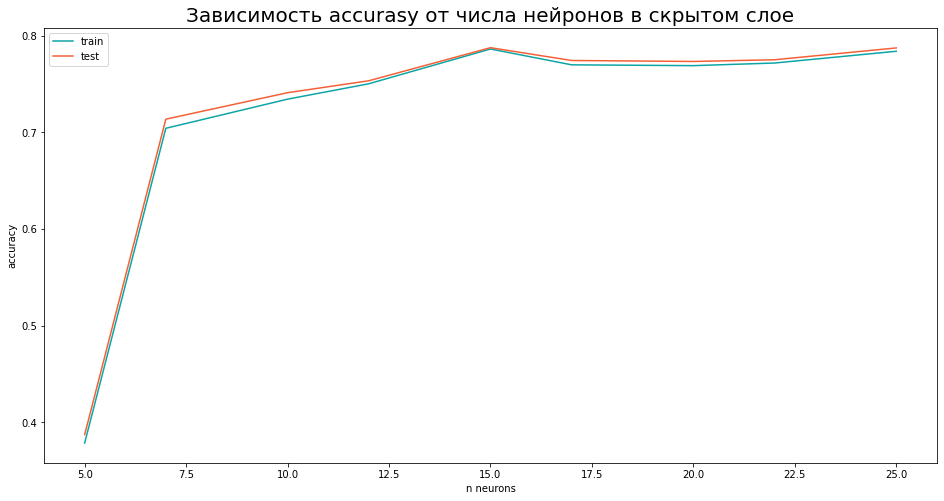

In [13]:
res_train = [results[model]['accuracy'][9] for model in results]
res_test = [results[model]['val_accuracy'][9] for model in results]

plt.figure(figsize=(16, 8))
plt.plot(n_neurons, res_train, label='train', c='#0CA4A5')
plt.plot(n_neurons, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа нейронов в скрытом слое', size=20)
plt.xlabel('n neurons')
plt.ylabel('accuracy')
plt.legend()
plt.show()


Водно, что с увеличением числа нейронов в скрытом слое двухслойной нейросети качество модели улучшается

In [ ]:
# (2, 3, 5, 10) - кол-во слоев
results_2 = {}

# двухслойная модель
model_2 = Sequential([
    Dense(20, input_shape=(28 * 28,), activation='relu'),
    Dense(10, activation='sigmoid')
])

model_2.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

mod_2 = model_2.fit(X_train, y_train,
                  epochs=10,
                  batch_size=500, 
                  verbose=1,
                  validation_split=0.2)

results_2['model_2'] = mod_2.history

# трехслойная модель
model_3 = Sequential([
    Dense(21, input_shape=(28 * 28,), activation='relu'),                  
    Dense(20, activation='relu'),
    Dense(10, activation='sigmoid')
])

model_3.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

mod_3 = model_3.fit(X_train, y_train,
                  epochs=10,
                  batch_size=500, 
                  verbose=1,
                  validation_split=0.2)

results_2['model_3'] = mod_3.history

# пятислойная модель
model_5 = Sequential([
    Dense(23, input_shape=(28 * 28,), activation='relu'),                  
    Dense(21, activation='relu'),
    Dense(20, activation='relu'),
    Dense(19, activation='relu'),
    Dense(10, activation='sigmoid')
])

model_5.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

mod_5 = model_5.fit(X_train, y_train,
                  epochs=10,
                  batch_size=500, 
                  verbose=1,
                  validation_split=0.2)

results_2['model_5'] = mod_5.history

# десятислойная модель
model_10 = Sequential([
    Dense(25, input_shape=(28 * 28,), activation='relu'),                  
    Dense(24, activation='relu'),
    Dense(23, activation='relu'),
    Dense(22, activation='relu'),
    Dense(21, activation='relu'),
    Dense(20, activation='relu'),
    Dense(19, activation='relu'),
    Dense(20, activation='relu'),
    Dense(20, activation='relu'),
    Dense(10, activation='sigmoid')
])

model_10.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

mod_10 = model_10.fit(X_train, y_train,
                  epochs=10,
                  batch_size=500, 
                  verbose=1,
                  validation_split=0.2)

results_2['model_10'] = mod_10.history

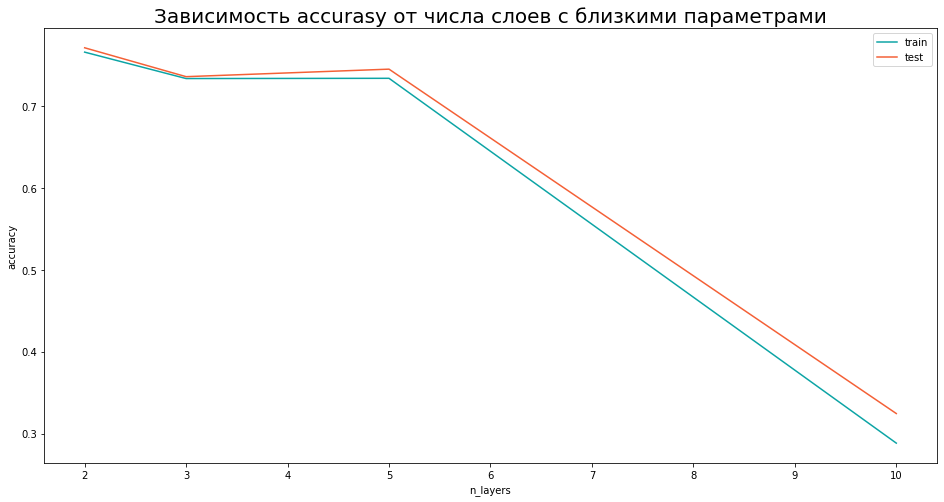

In [15]:
n_layers = [2, 3, 5, 10]
res_train = [results_2[model]['accuracy'][9] for model in results_2]
res_test = [results_2[model]['val_accuracy'][9] for model in results_2]

plt.figure(figsize=(16, 8))
plt.plot(n_layers, res_train, label='train', c='#0CA4A5')
plt.plot(n_layers, res_test, label='test', c='#F46036')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=20)
plt.xlabel('n_layers')
plt.ylabel('accuracy')
plt.legend()
plt.show()

А с увеличением числа скрытых слоев с похожими параметрами метрика сильно уменьшается

2.  Проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1. Фиксируйте для тренировочного и тестового набора метрики accuracy.


In [ ]:
results_3 = {}

for i, optimizer_ in enumerate([keras.optimizers.gradient_descent_v2.SGD(),
                             keras.optimizers.adagrad_v2.Adagrad(),
                             keras.optimizers.rmsprop_v2.RMSprop(),
                             keras.optimizers.adam_v2.Adam()]):

    model_2 = Sequential([
        Dense(20, input_shape=(28 * 28,), activation='relu'),
        Dense(10, activation='sigmoid')
    ])
    model_2.compile(loss='categorical_crossentropy', 
                    optimizer=optimizer_, 
                    metrics=['accuracy'])

    mod_2 = model_2.fit(X_train, y_train,
                      epochs=10,
                      batch_size=500, 
                      verbose=1,
                      validation_split=0.2)

    results_3[f'model_{i}'] = mod_2.history

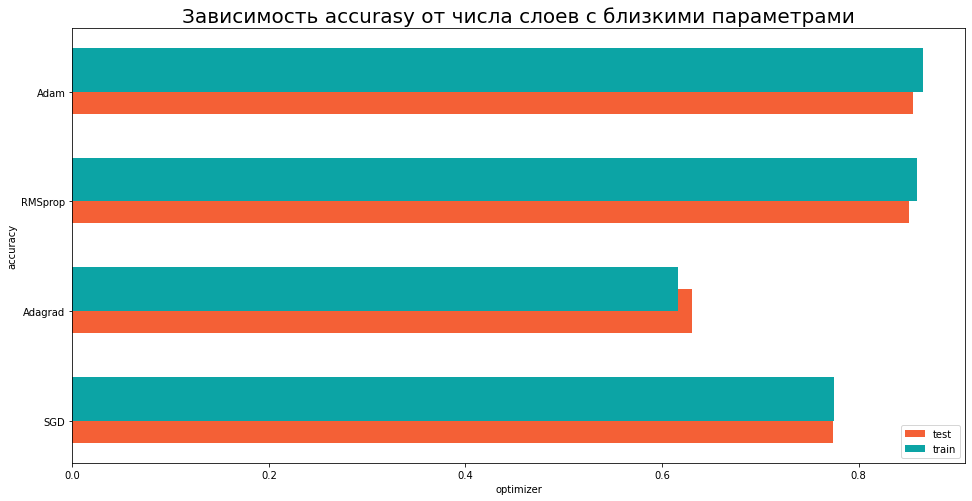

In [17]:
optimizers = ['SGD', 'Adagrad', 'RMSprop', 'Adam']
res_train = [results_3[model]['accuracy'][9] for model in results_3]
res_test = [results_3[model]['val_accuracy'][9] for model in results_3]

plt.figure(figsize=(16, 8))

plt.barh(optimizers, res_test, label='test', color='#F46036', height=0.4)
plt.barh(optimizers, res_train, label='train', color='#0CA4A5', height=0.4, align='edge')

plt.title('Зависимость accurasy от числа слоев с близкими параметрами', size=20)
plt.xlabel('optimizer')
plt.ylabel('accuracy')
plt.legend()
plt.show()

Самый лучший результат при одинаковых параметрах модели показывает Adam оптимизатор, очень близкое к нему качество показывает RMSprop

3. Сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе? 

  - Для того, чтобы улучшить модель, я увеличила число нейронов, увеличила число эпох и уменьшила размер батчей. Лучшая модель будет использована для предсказания ниже.

4. Для одного варианта сети сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность).

In [ ]:
model_fin = Sequential([
    Dense(30, input_shape=(28 * 28,), activation='tanh'),
    Dense(10, activation='sigmoid')
])
model_fin.compile(loss='categorical_crossentropy', 
                optimizer='Adam', 
                metrics=['accuracy'])

mod = model_fin.fit(X_train, y_train,
                  epochs=40,
                  batch_size=100, 
                  verbose=1,
                  validation_split=0.2)

mod.history

In [36]:
print(f"Метрика на train: {max(mod.history['accuracy'])}", 
      f"Метрика на test: {max(mod.history['val_accuracy'])}", sep="\n")

Метрика на train: 0.9248958230018616
Метрика на test: 0.8840000033378601


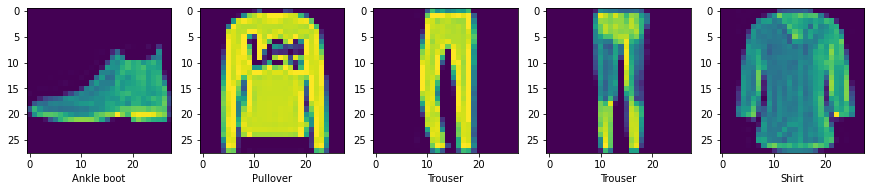

In [39]:
N = 5
y_pred = model_fin.predict(X_test)
y_pred_class = np.argmax(y_pred, axis=1)
plt.figure(figsize=(3 * 5, 5))

for i in range(N):
  plt.subplot(1, N, i+1)
  plt.imshow(X_test[i,:].reshape(28, 28))
  plt.xlabel(classes[str(y_pred_class[i])])
plt.show()  

In [43]:
y_pred_class[:5], y_test_labels[:5] 

(array([9, 2, 1, 1, 6]), array([9, 2, 1, 1, 6], dtype=uint8))

In [45]:
confusion_matrix(y_test_labels, y_pred_class)


array([[840,   1,  16,  28,   4,   1, 104,   0,   6,   0],
       [  8, 965,   6,  16,   3,   0,   2,   0,   0,   0],
       [ 16,   1, 826,  12,  77,   0,  68,   0,   0,   0],
       [ 35,  13,  17, 872,  25,   1,  33,   0,   4,   0],
       [  1,   1, 135,  37, 754,   0,  65,   1,   6,   0],
       [  1,   0,   0,   1,   0, 946,   0,  26,   3,  23],
       [160,   1, 107,  19,  55,   1, 648,   0,   9,   0],
       [  0,   0,   0,   0,   0,  29,   0, 942,   1,  28],
       [ 10,   0,  10,   4,   7,   6,   8,   6, 949,   0],
       [  0,   0,   0,   0,   0,  15,   0,  32,   1, 952]])

In [52]:
classification_report(y_test_labels, y_pred_class, 
                      output_dict=True, 
                      target_names=classes.values())

{'Ankle boot': {'f1-score': 0.9505741387918122,
  'precision': 0.9491525423728814,
  'recall': 0.952,
  'support': 1000},
 'Bag': {'f1-score': 0.9590702374936836,
  'precision': 0.9693564862104188,
  'recall': 0.949,
  'support': 1000},
 'Coat': {'f1-score': 0.7833766233766234,
  'precision': 0.8151351351351351,
  'recall': 0.754,
  'support': 1000},
 'Dress': {'f1-score': 0.8768225238813474,
  'precision': 0.8816986855409504,
  'recall': 0.872,
  'support': 1000},
 'Pullover': {'f1-score': 0.7803495512517713,
  'precision': 0.7394807520143241,
  'recall': 0.826,
  'support': 1000},
 'Sandal': {'f1-score': 0.9464732366183091,
  'precision': 0.9469469469469469,
  'recall': 0.946,
  'support': 1000},
 'Shirt': {'f1-score': 0.6721991701244814,
  'precision': 0.6982758620689655,
  'recall': 0.648,
  'support': 1000},
 'Sneaker': {'f1-score': 0.9387144992526159,
  'precision': 0.9354518371400199,
  'recall': 0.942,
  'support': 1000},
 'T-shirt/top': {'f1-score': 0.8112023177209078,
  'prec

Видно, что модель дает неплохой результат на большинстве классов. Немного хуже модель определяет шорты, футболки, пулловеры и плащи